### 100,000 UK Used Car Data set\n
https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes
1. Выбрать набор данных для своей группы: <br>
3530203_70101: Audi <br>
3530203_70102: BMW <br>
3530903_70301: Ford <br>
3530903_70302: Mercedes<br>
2. Разбить данные на тренировочные и тестовые (70% на 30%, random_state=10).
3. Попытаться обучить регрессии c лучшим качеством.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

np.set_printoptions(precision=3)
pd.set_option('precision', 3)

sns.set()

In [2]:
auto_data = pd.read_csv("bmw.csv")
auto_data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0
...,...,...,...,...,...,...,...,...,...
10776,X3,2016,19000,Automatic,40818,Diesel,150,54.3,2.0
10777,5 Series,2016,14600,Automatic,42947,Diesel,125,60.1,2.0
10778,3 Series,2017,13100,Manual,25468,Petrol,200,42.8,2.0
10779,1 Series,2014,9930,Automatic,45000,Diesel,30,64.2,2.0


In [3]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


In [4]:
auto_data.describe()

,year,price,mileage,tax,mpg,engineSize
count,10781.000,10781.000,10781.000,10781.000,10781.000,10781.000
mean,2017.079,22733.409,25496.987,131.702,56.399,2.168
std,2.349,11415.528,25143.193,61.511,31.337,0.552
min,1996.000,1200.000,1.000,0.000,5.500,0.000
25%,2016.000,14950.000,5529.000,135.000,45.600,2.000
50%,2017.000,20462.000,18347.000,145.000,53.300,2.000
75%,2019.000,27940.000,38206.000,145.000,62.800,2.000
max,2020.000,123456.000,214000.000,580.000,470.800,6.600


Исходя из первичного анализа данных функциями info() и describe() можно сделать вывод, что null значений в датасете нет, но есть потенциально неправильно внесенные данные/выбросы

Для начала проверим машины с атрибутом engineSize == 0, так как такое значение является подозрительным.


In [5]:

auto_data[auto_data.engineSize == 0]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
621,i3,2017,19998,Automatic,41949,Hybrid,140,470.8,0.0
778,i3,2017,19998,Automatic,41146,Hybrid,0,470.8,0.0
780,i3,2017,21898,Automatic,10839,Hybrid,0,470.8,0.0
1866,i3,2017,19980,Automatic,26965,Hybrid,140,470.8,0.0
2352,i3,2016,19490,Automatic,8421,Hybrid,0,470.8,0.0
3277,i3,2016,16482,Automatic,43695,Hybrid,0,470.8,0.0
3628,i3,2015,14285,Automatic,65800,Hybrid,0,470.8,0.0
3913,i3,2017,18500,Automatic,36429,Hybrid,0,470.8,0.0
4100,i3,2017,19495,Automatic,17338,Hybrid,135,470.8,0.0
4109,i3,2015,17481,Automatic,9886,Hybrid,0,470.8,0.0


In [6]:
auto_data[( auto_data.model == auto_data.loc[8701].model) & ( auto_data.transmission == auto_data.loc[8701].transmission) & ( auto_data.fuelType == auto_data.loc[8701].fuelType)]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
17,3 Series,2017,16000,Automatic,45456,Diesel,30,64.2,2.0
21,3 Series,2015,12600,Automatic,78957,Diesel,30,62.8,2.0
22,3 Series,2016,15100,Automatic,29213,Diesel,30,64.2,2.0
26,3 Series,2019,17800,Automatic,22310,Diesel,145,64.2,2.0
27,3 Series,2016,14400,Automatic,51994,Diesel,30,62.8,2.0
...,...,...,...,...,...,...,...,...,...
10723,3 Series,2014,13990,Automatic,45000,Diesel,30,62.8,2.0
10737,3 Series,2014,17499,Automatic,48100,Diesel,160,52.3,3.0
10754,3 Series,2013,14950,Automatic,66500,Diesel,160,52.3,3.0
10756,3 Series,2005,5678,Automatic,63000,Diesel,260,42.2,2.0


Видно, что значения engineSize == 0 скорее всего являются выбросами. Так как таких строк в датасете немного, удалим подобные значения. 

In [7]:
auto_data = auto_data[auto_data.engineSize > 0]
auto_data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0
...,...,...,...,...,...,...,...,...,...
10776,X3,2016,19000,Automatic,40818,Diesel,150,54.3,2.0
10777,5 Series,2016,14600,Automatic,42947,Diesel,125,60.1,2.0
10778,3 Series,2017,13100,Manual,25468,Petrol,200,42.8,2.0
10779,1 Series,2014,9930,Automatic,45000,Diesel,30,64.2,2.0


Проверим подозрительные малые значения атрибута mpg (Miles Per Gallon). Так как у всех строк данной модели с такой комплектацией значения одинаковые, видимо данные значения являются правильными (хотя желательно уточнить у эксперта предметной области)

In [8]:
auto_data[auto_data.mpg < 6]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
1237,X3,2020,52910,Semi-Auto,101,Hybrid,135,5.5,2.0
2116,X3,2020,54990,Semi-Auto,2137,Hybrid,135,5.5,2.0
6132,X3,2020,47000,Semi-Auto,1385,Hybrid,135,5.5,2.0
6172,X3,2020,42990,Semi-Auto,3245,Hybrid,140,5.5,2.0
6198,X3,2020,53995,Semi-Auto,2000,Hybrid,135,5.5,2.0
6965,X3,2020,52991,Semi-Auto,4360,Hybrid,135,5.5,2.0


In [9]:
auto_data[( auto_data.model == auto_data.loc[1237].model) & ( auto_data.transmission == auto_data.loc[1237].transmission) & ( auto_data.fuelType == auto_data.loc[1237].fuelType)]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
1237,X3,2020,52910,Semi-Auto,101,Hybrid,135,5.5,2.0
2116,X3,2020,54990,Semi-Auto,2137,Hybrid,135,5.5,2.0
6132,X3,2020,47000,Semi-Auto,1385,Hybrid,135,5.5,2.0
6172,X3,2020,42990,Semi-Auto,3245,Hybrid,140,5.5,2.0
6198,X3,2020,53995,Semi-Auto,2000,Hybrid,135,5.5,2.0
6965,X3,2020,52991,Semi-Auto,4360,Hybrid,135,5.5,2.0


In [10]:
auto_data[auto_data.tax == 0]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
23,1 Series,2016,9400,Manual,44498,Diesel,0,83.1,1.5
32,i3,2016,17100,Automatic,25269,Other,0,470.8,0.6
35,2 Series,2017,13000,Automatic,61818,Other,0,141.2,1.5
48,1 Series,2016,9200,Manual,48858,Diesel,0,83.1,1.5
59,1 Series,2015,11100,Manual,11524,Diesel,0,83.1,1.5
...,...,...,...,...,...,...,...,...,...
10763,1 Series,2016,8500,Manual,68810,Diesel,0,83.1,1.5
10764,1 Series,2016,9100,Manual,54596,Diesel,0,83.1,1.5
10765,3 Series,2016,17700,Automatic,20670,Other,0,134.5,2.0
10766,1 Series,2016,8700,Manual,54987,Diesel,0,83.1,1.5


В определенных случаях автомобили могут быть освобождены от уплаты налога, так что уверенности в том что это выбросы нет. 

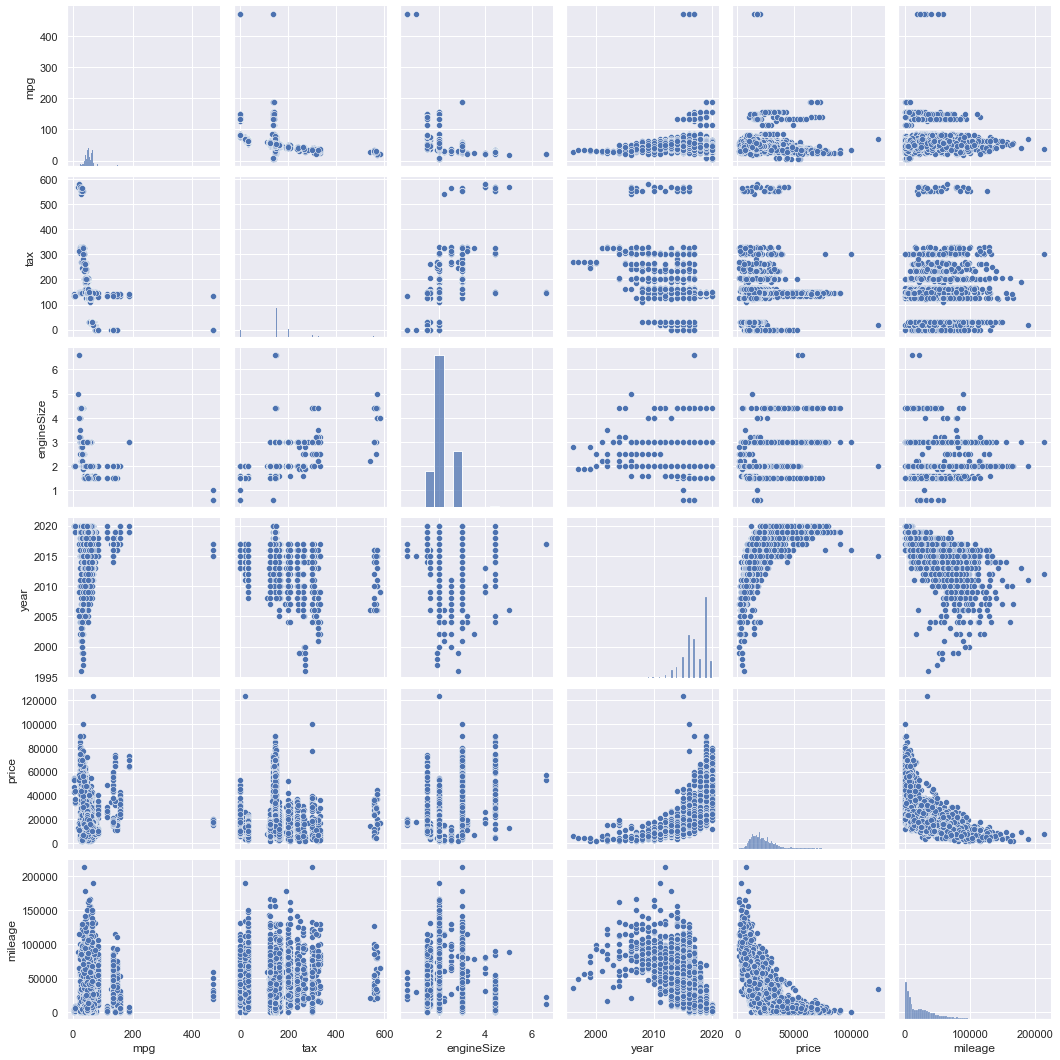

In [11]:
num_columns = list(set(auto_data.columns))
sns.pairplot(auto_data[num_columns])

<AxesSubplot:>

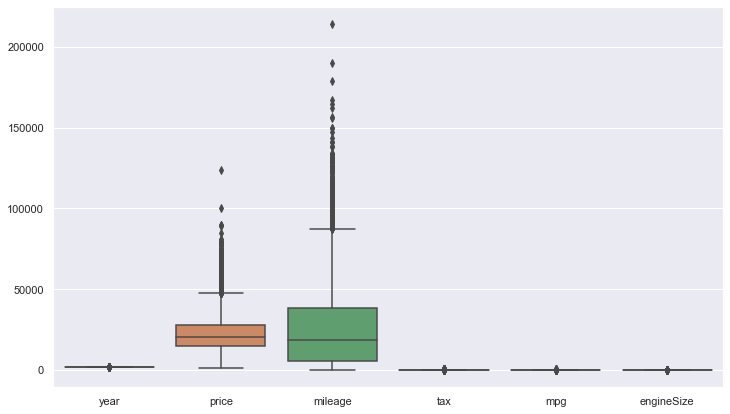

In [12]:
plt.subplots(figsize=(12,7))
sns.boxplot(data=auto_data)

Значение цены "123456" явно является выбросом. Удаляем из датасета.

In [13]:
auto_data[auto_data.price>80000]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
721,8 Series,2019,84898,Semi-Auto,3185,Petrol,145,24.4,4.4
1813,8 Series,2019,88980,Semi-Auto,88,Petrol,145,24.4,4.4
2909,M4,2017,89990,Semi-Auto,1336,Petrol,145,33.2,3.0
3638,2 Series,2015,123456,Semi-Auto,33419,Diesel,20,68.9,2.0
4776,M5,2019,89900,Semi-Auto,2269,Petrol,145,24.1,4.4
5362,M4,2016,99950,Automatic,771,Petrol,300,33.2,3.0
5877,M5,2019,81140,Semi-Auto,551,Petrol,145,24.1,4.4


In [14]:
auto_data = auto_data[auto_data.index != 3638]

In [15]:
Y = auto_data['price']
X = auto_data.drop(['price'], axis=1)
X

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,Automatic,39554,Diesel,160,50.4,3.0
...,...,...,...,...,...,...,...,...
10776,X3,2016,Automatic,40818,Diesel,150,54.3,2.0
10777,5 Series,2016,Automatic,42947,Diesel,125,60.1,2.0
10778,3 Series,2017,Manual,25468,Petrol,200,42.8,2.0
10779,1 Series,2014,Automatic,45000,Diesel,30,64.2,2.0


In [16]:
model_encoder = LabelEncoder()
transmission_encoder = LabelEncoder()
fuelType_encoder = LabelEncoder()


In [17]:
model_encoder.fit(X.model)
transmission_encoder.fit(X.transmission)
fuelType_encoder.fit(X.fuelType)

LabelEncoder()

In [18]:
X.model = model_encoder.transform(X.model)
X.transmission = transmission_encoder.transform(X.transmission)
X.fuelType = fuelType_encoder.transform(X.fuelType)
X

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,4,2014,0,67068,0,125,57.6,2.0
1,5,2018,0,14827,4,145,42.8,2.0
2,4,2016,0,62794,0,160,51.4,3.0
3,0,2017,0,26676,0,145,72.4,1.5
4,6,2014,0,39554,0,160,50.4,3.0
...,...,...,...,...,...,...,...,...
10776,15,2016,0,40818,0,150,54.3,2.0
10777,4,2016,0,42947,0,125,60.1,2.0
10778,2,2017,1,25468,4,200,42.8,2.0
10779,0,2014,0,45000,0,30,64.2,2.0


In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)
X_train.shape, X_test.shape

((7513, 8), (3220, 8))

In [20]:
reg = LinearRegression()
reg.fit(X_train, Y_train)
reg.score(X_test, Y_test)

0.7636740106183753

In [21]:
prediction = reg.predict(X_test)
(Y_test - prediction).abs().describe()

count     3220.000
mean      3848.839
std       3945.004
min          0.147
25%       1295.372
50%       2916.020
75%       5239.159
max      41595.074
Name: price, dtype: float64

In [22]:
prediction

array([33833.415, 32015.212, 12015.138, ..., 20776.855, 24743.184,
       23725.393])

Text(0, 0.5, 'Target')

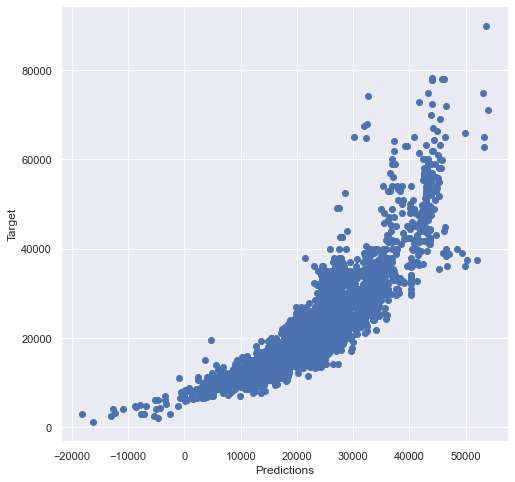

In [23]:
plt.figure(figsize=(8, 8))
plt.scatter(prediction, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Target')

In [24]:
import sklearn.metrics as metrics

from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split



In [25]:
simple_LR_MSE = metrics.mean_squared_error(Y_test, prediction)

print (f'MSE = {round(simple_LR_MSE,3)}')

MSE = 30371783.093


In [26]:
std_scaler = StandardScaler()

X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

X_train_scaled

array([[-0.538,  0.824, -1.26 , ...,  0.217, -0.309, -0.33 ],
       [-0.706, -1.3  , -0.11 , ..., -0.11 ,  0.177, -0.33 ],
       [-0.873,  1.248,  1.041, ...,  0.217, -0.309, -0.33 ],
       ...,
       [-0.873,  1.248,  1.041, ...,  0.217,  0.12 , -1.263],
       [-0.538,  1.248,  1.041, ...,  0.217, -0.347,  1.535],
       [ 1.306, -0.026,  1.041, ...,  0.462, -0.494, -0.33 ]])

In [27]:
simple_LR = LinearRegression()

simple_LR.fit(X_train_scaled, Y_train)
simple_LR_predictions = simple_LR.predict(X_test_scaled)

simple_LR_MSE = metrics.mean_squared_error(Y_test, simple_LR_predictions)

print (f'MSE = {round(simple_LR_MSE,3)}')

MSE = 30371783.093


Text(0, 0.5, 'Target')

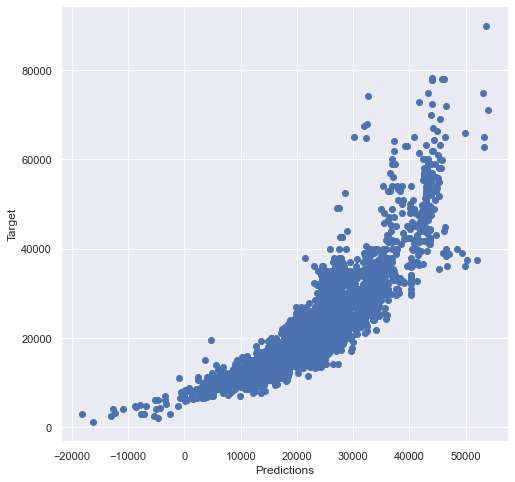

In [28]:
plt.figure(figsize=(8, 8))
plt.scatter(simple_LR_predictions, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Target')

In [29]:
model = Lasso()

model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions), 3)}')

RMSE = 30372191.826


In [30]:
model = LassoCV(random_state=10)

model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions), 3)}')

RMSE = 30375007.681


In [31]:
model = Ridge()

model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions), 3)}')

RMSE = 30372085.751


In [32]:
model = RidgeCV()

model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions), 3)}')

RMSE = 30374912.696


In [33]:
from sklearn.preprocessing import MaxAbsScaler
import lightgbm as lgb

In [34]:
transformer = MaxAbsScaler().fit(X)
transformer.transform(X)

array([[0.174, 0.997, 0.   , ..., 0.216, 0.122, 0.303],
       [0.217, 0.999, 0.   , ..., 0.25 , 0.091, 0.303],
       [0.174, 0.998, 0.   , ..., 0.276, 0.109, 0.455],
       ...,
       [0.087, 0.999, 0.5  , ..., 0.345, 0.091, 0.303],
       [0.   , 0.997, 0.   , ..., 0.052, 0.136, 0.303],
       [0.565, 0.999, 0.   , ..., 0.216, 0.122, 0.303]])

In [35]:
# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, Y_train)
lgb_eval = lgb.Dataset(X_test, Y_test)

# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=50,
                valid_sets=lgb_eval,
                early_stopping_rounds=20)


# predict
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
# eval
print (f'RMSE = {round(metrics.mean_squared_error(Y_test, y_pred), 3)}')

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000495 seconds.
You can set `force_col_wise=true` to remove the overhead.
[1]	valid_0's l2: 1.17627e+08	valid_0's l1: 8042.89
Training until validation scores don't improve for 20 rounds
[2]	valid_0's l2: 1.08155e+08	valid_0's l1: 7700.61
[3]	valid_0's l2: 9.90643e+07	valid_0's l1: 7355.12
[4]	valid_0's l2: 9.13135e+07	valid_0's l1: 7051.34
[5]	valid_0's l2: 8.38778e+07	valid_0's l1: 6743.39
[6]	valid_0's l2: 7.72744e+07	valid_0's l1: 6458.78
[7]	valid_0's l2: 7.11553e+07	valid_0's l1: 6183.03
[8]	valid_0's l2: 6.57406e+07	valid_0's l1: 5923.96
[9]	valid_0's l2: 6.08674e+07	valid_0's l1: 5687.28
[10]	valid_0's l2: 5.62794e+07	valid_0's l1: 5455.99
[11]	valid_0's l2: 5.21347e+07	valid_0's l1: 5237.68
[12]	valid_0's l2: 4.85513e+07	valid_0's l1: 5044.34
[13]	valid_0's l2: 4.53186e+07	valid_0's l1: 4864.25
[14]	valid_0's l2: 4.21844e+07	valid_0's l1: 4681.42
[15]	valid_0's l2: 3.95221e+07	valid_0's 

Text(0, 0.5, 'Target')

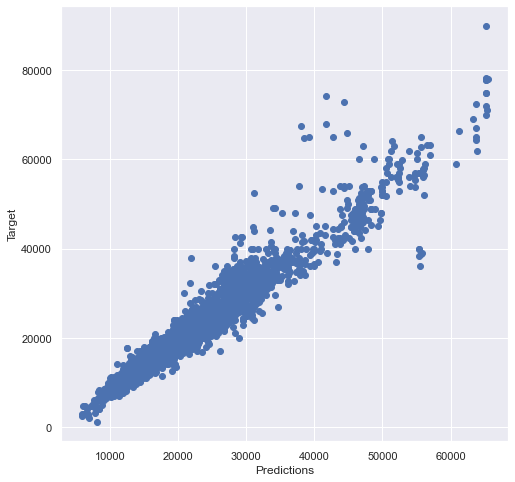

In [36]:
plt.figure(figsize=(8, 8))
plt.scatter(y_pred, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Target')

In [37]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor


In [38]:
r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=10, random_state=1)
er = VotingRegressor([('lr', r1), ('rf', r2)])
Voting_pred=er.fit(X_test, Y_test).predict(X_test)

print (f'RMSE = {round(metrics.mean_squared_error(Voting_pred, y_pred), 3)}')

RMSE = 5837492.243


Text(0, 0.5, 'Target')

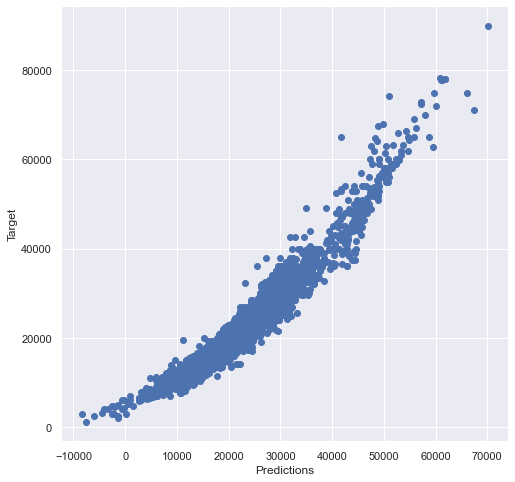

In [39]:
plt.figure(figsize=(8, 8))
plt.scatter(Voting_pred, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Target')